<a href="https://colab.research.google.com/github/GaneshInnovator/Display-Different-Pixels-from-Images/blob/main/Image_Pixels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connected Region Group 1 - Total Regions: 3


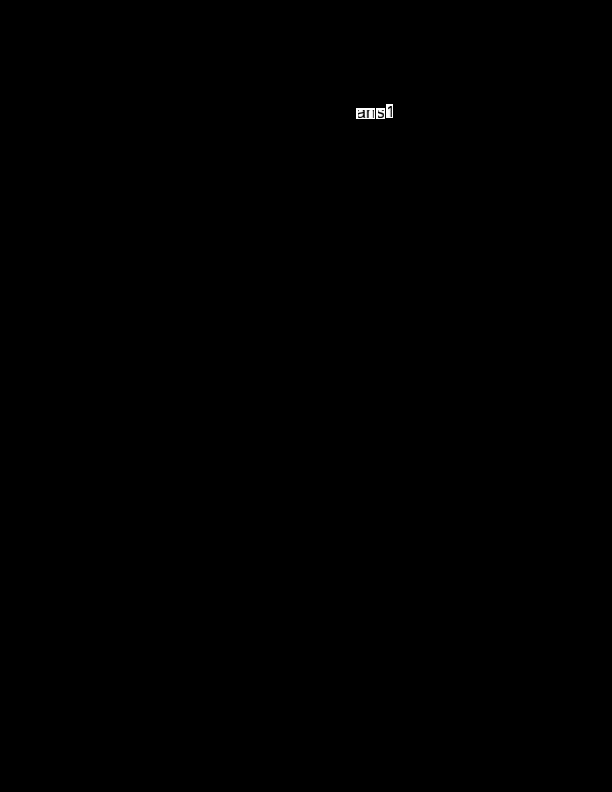

Connected Region Group 2 - Total Regions: 4


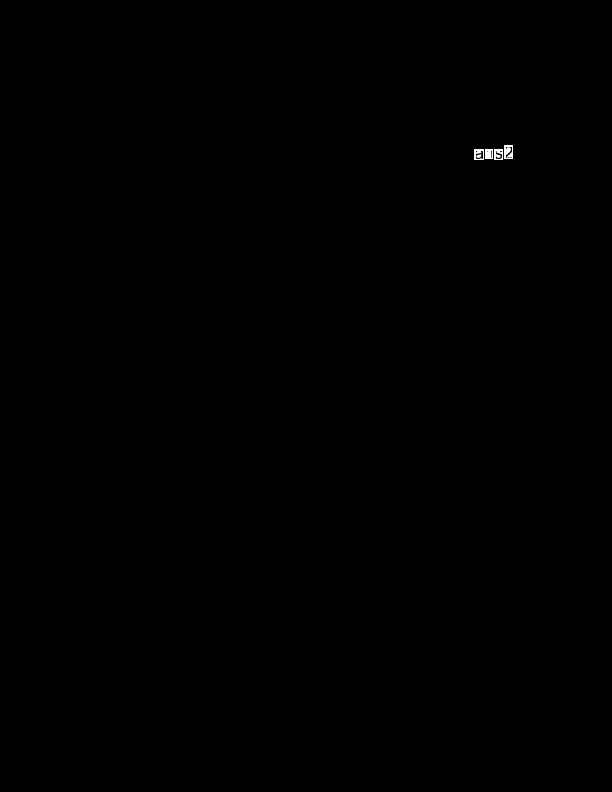

Connected Region Group 3 - Total Regions: 2


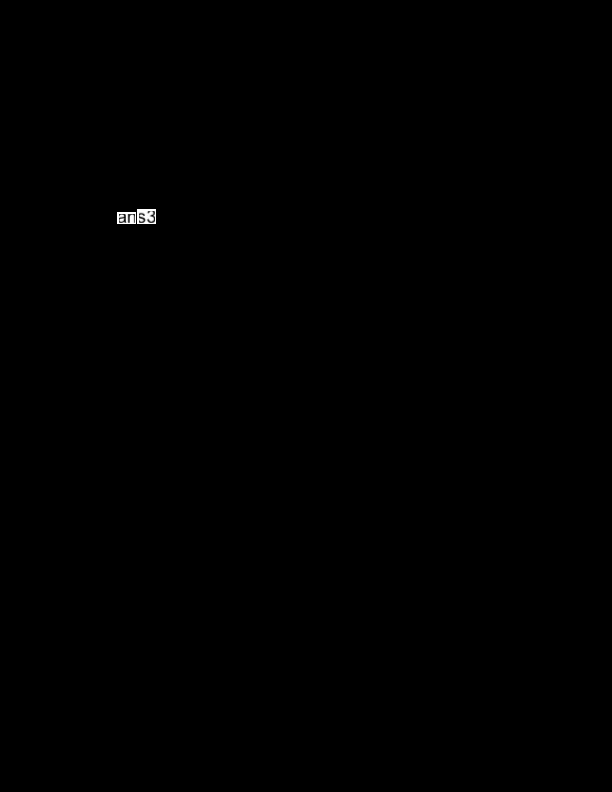

Connected Region Group 4 - Total Regions: 2


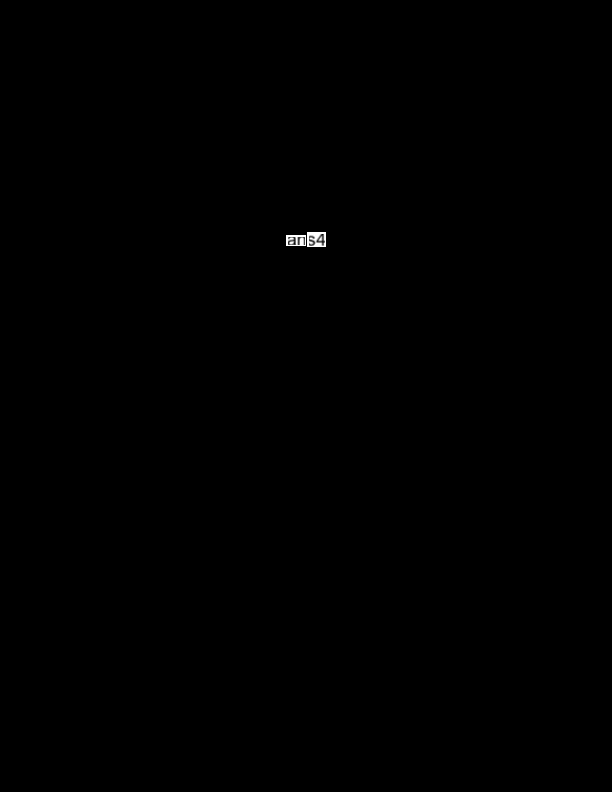

Connected Region Group 5 - Total Regions: 4


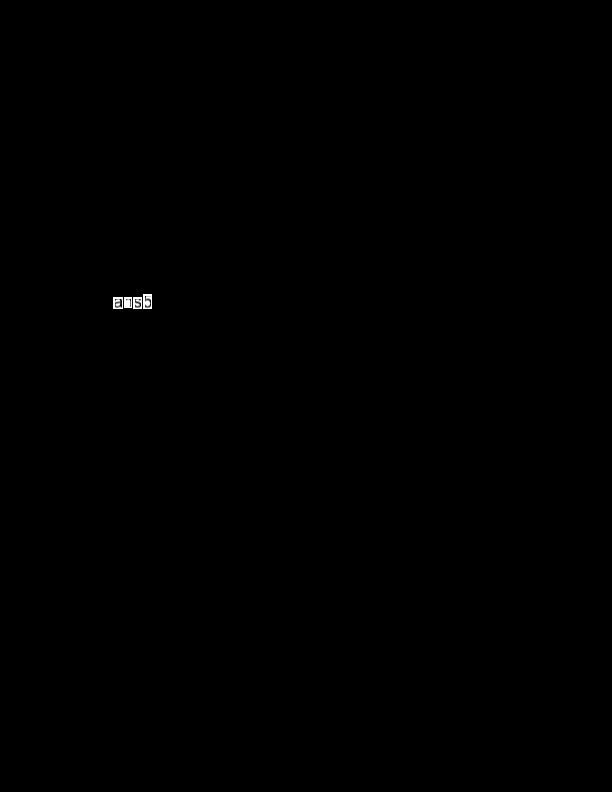

Connected Region Group 6 - Total Regions: 2


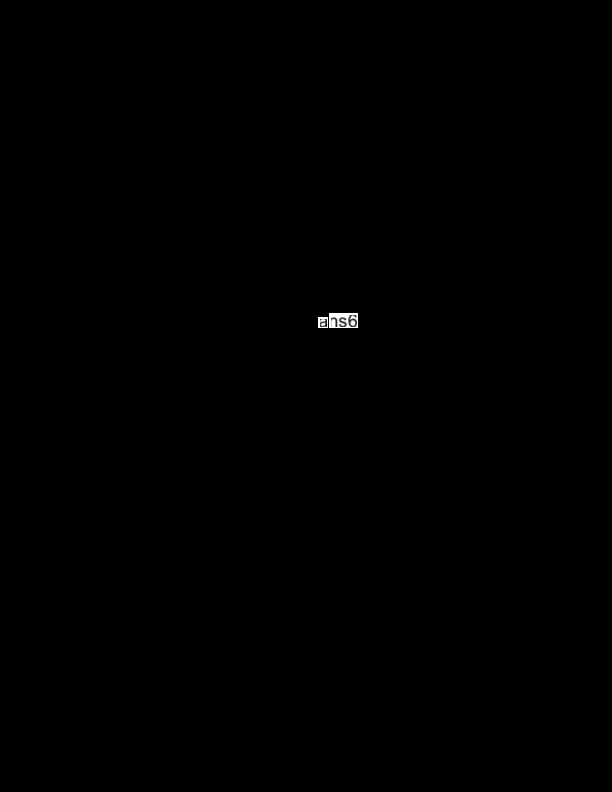

Connected Region Group 7 - Total Regions: 3


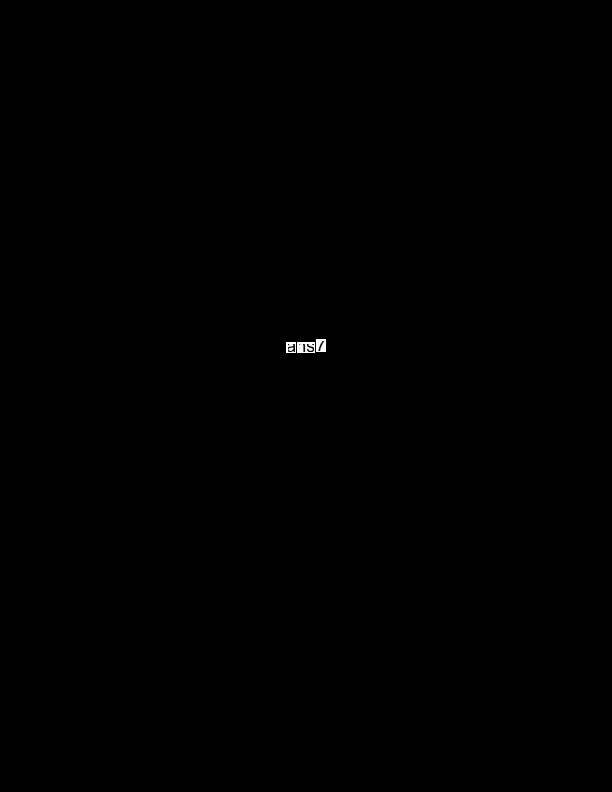

Connected Region Group 8 - Total Regions: 4


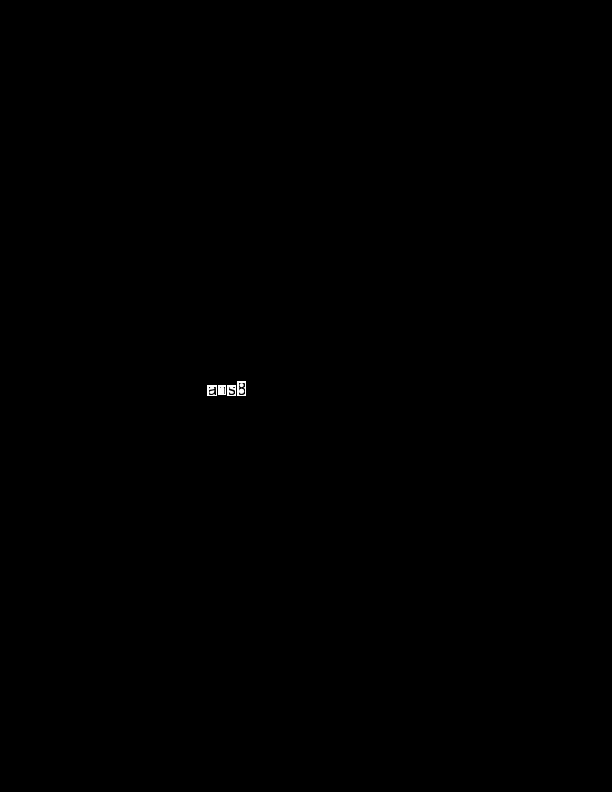

Connected Region Group 9 - Total Regions: 4


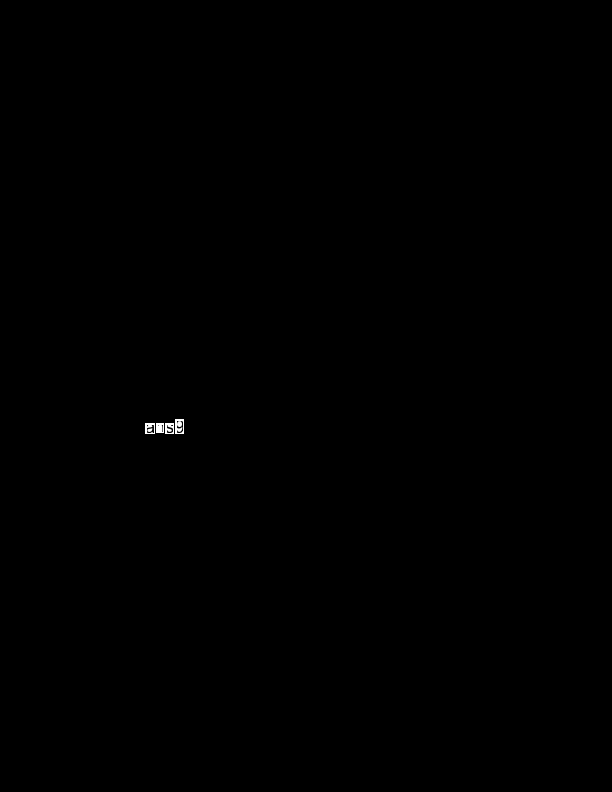

Connected Region Group 10 - Total Regions: 5


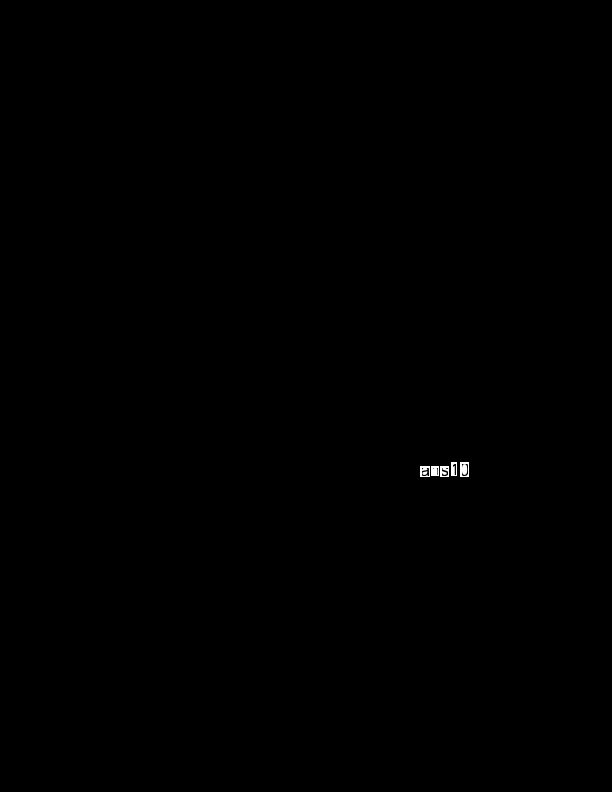

Connected Region Group 11 - Total Regions: 5


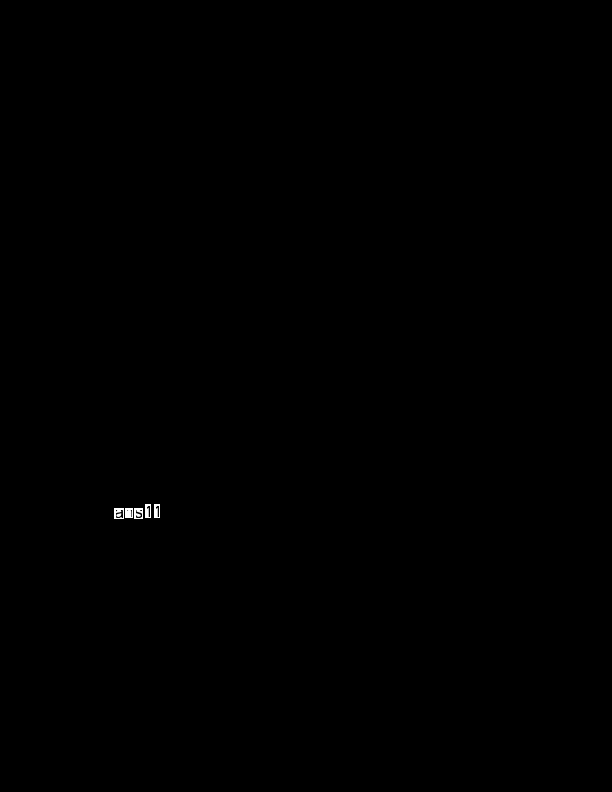

Connected Region Group 12 - Total Regions: 5


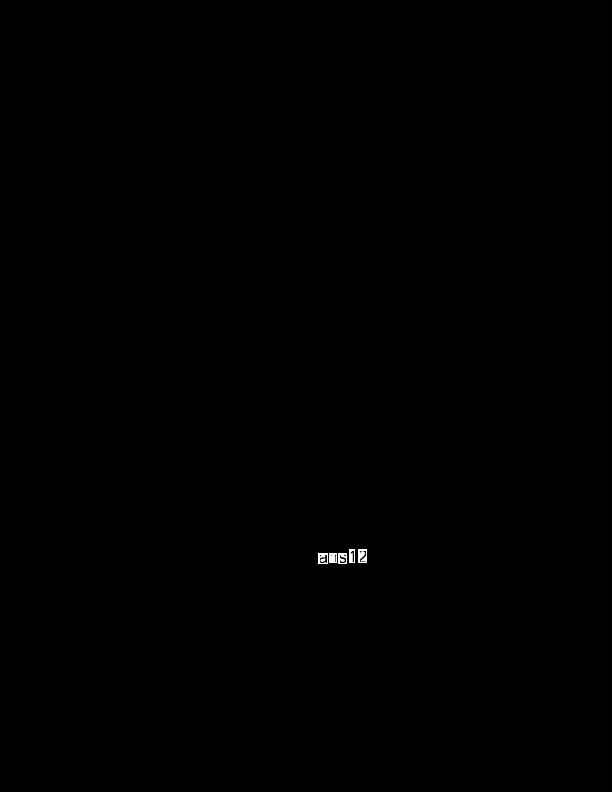

Connected Region Group 13 - Total Regions: 5


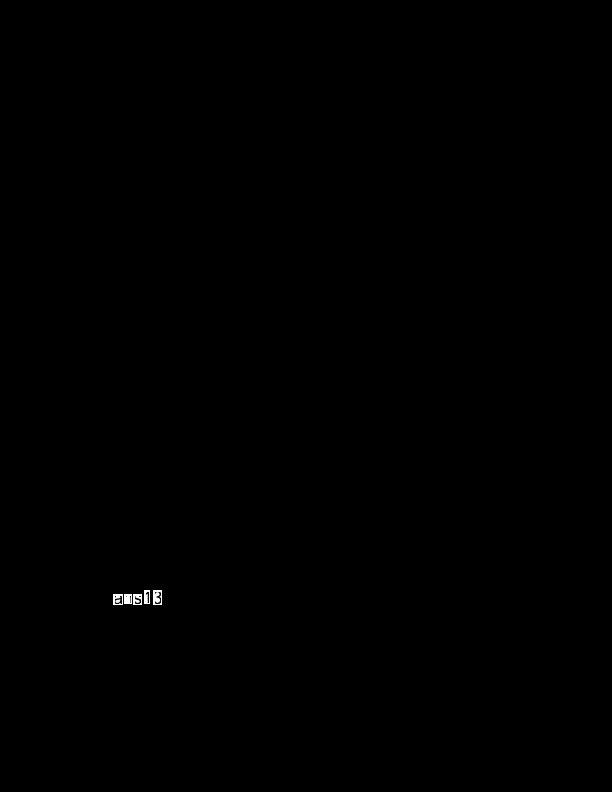

Connected Region Group 14 - Total Regions: 5


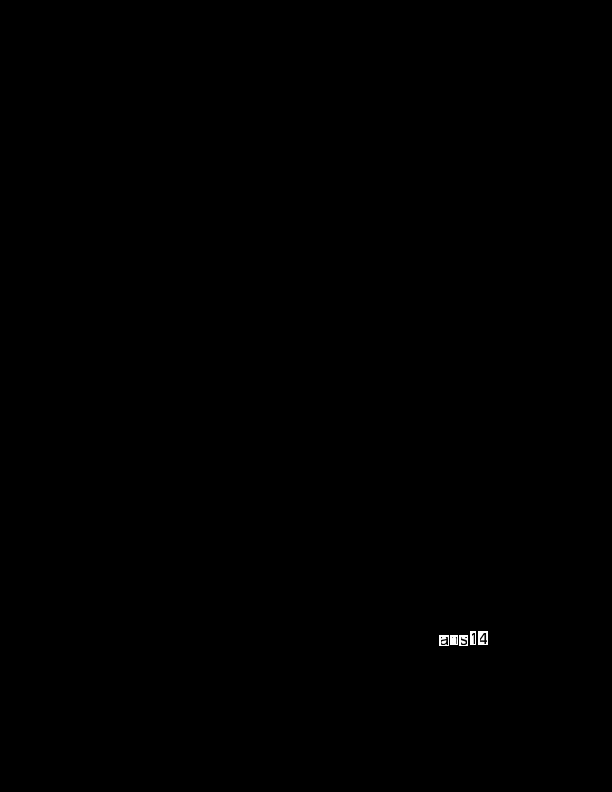

Connected Region Group 15 - Total Regions: 5


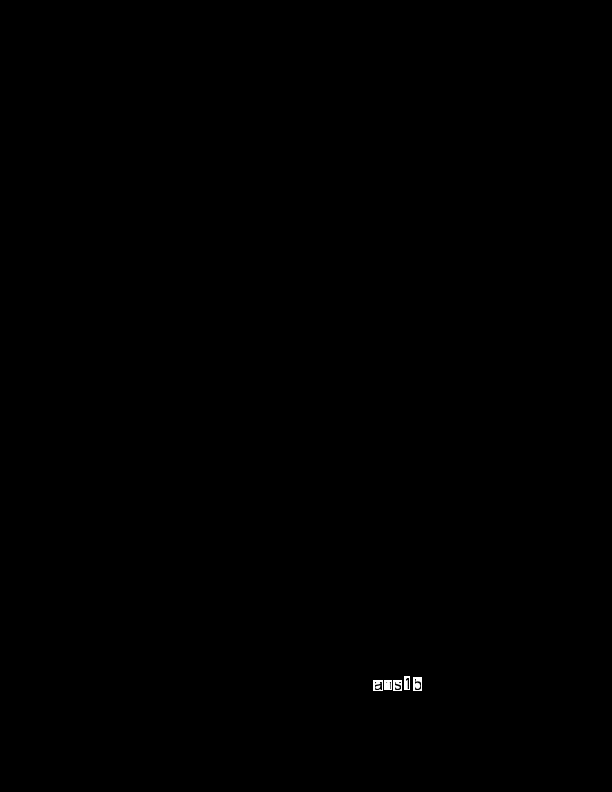

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def find_closest_regions(regions):
    closest_regions = []
    regions_copy = regions.copy()

    while regions_copy:
        region = regions_copy.pop(0)
        center_x, center_y = region[0] + region[2] // 2, region[1] + region[3] // 2
        closest_region_group = [region]

        for other_region in regions_copy[:]:
            other_center_x, other_center_y = other_region[0] + other_region[2] // 2, other_region[1] + other_region[3] // 2
            distance = np.sqrt((center_x - other_center_x) ** 2 + (center_y - other_center_y) ** 2)
            if distance < 26:
                closest_region_group.append(other_region)
                regions_copy.remove(other_region)

        closest_regions.append(closest_region_group)

    return closest_regions

def mark_different_pixels(question_image_path, answers_image_path):
    question_image = cv2.imread(question_image_path)
    answers_image = cv2.imread(answers_image_path)

    question_image = cv2.resize(question_image, (answers_image.shape[1], answers_image.shape[0]))

    mask = cv2.absdiff(question_image, answers_image)
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    _, threshold_mask = cv2.threshold(mask_gray, 15, 255, cv2.THRESH_BINARY)

    # Find contours of the differences (filled answers)
    contours, _ = cv2.findContours(threshold_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Group the regions by proximity
    region_groups = find_closest_regions([cv2.boundingRect(contour) for contour in contours])

    region_groups.sort(key=lambda group: group[0][1])

    # Convert and display each connected region group in the answers image as a separate image
    for group_idx, region_group in enumerate(region_groups):
        print(f"Connected Region Group {group_idx + 1} - Total Regions: {len(region_group)}")

        # Create a blank image to combine the regions of the current group
        combined_image = np.zeros_like(answers_image)

        # Extract and print text from each region
        for region_idx, (x, y, w, h) in enumerate(region_group):
            marked_region_answers = answers_image[y:y + h, x:x + w]

            # Draw rectangles around the different pixels in the original answers image
            cv2.rectangle(answers_image, (x, y), (x + w, y + h), (255, 255, 255), 2)

            # Add the current region to the combined image for the group
            combined_image[y:y + h, x:x + w] = marked_region_answers

        # Display the combined image for the current group
        cv2_imshow(combined_image)

    return answers_image

marked_answers = mark_different_pixels('/content/drive/MyDrive/Fill in the blanks empty sheet.jpg', '/content/drive/MyDrive/Fill in the blanks answe1.jpeg')


In [ ]:
!sudo apt-get install tesseract-ocr
!sudo apt-get install tesseract-ocr-eng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 9 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (12.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debcon

In [ ]:
!pip install pytesseract==0.3.8

  Preparing metadata (setup.py) ... done
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14054 sha256=f7e59c4e657d43d75443a06ed8612ac6dd7abafbbf3fa6e3c4217c23cf00d4fa
  Stored in directory: /root/.cache/pip/wheels/12/da/59/98980d2d1409e5121d436393bc02aca847e4997c07ce9d7d93
Successfully built pytesseract


Row 1 Marked Pixel Values:
Marked Region 1 - Question Pixel Values: 
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
 

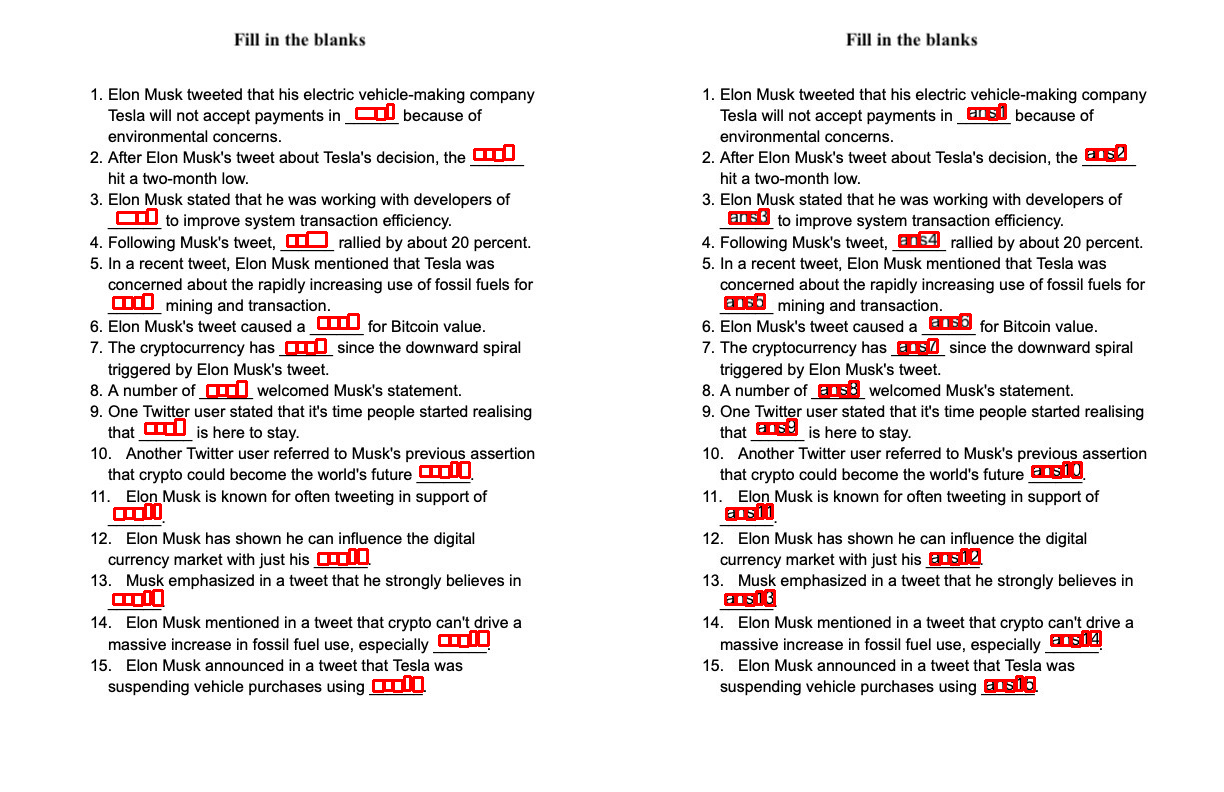

In [1]:
import cv2
from google.colab.patches import cv2_imshow

def mark_different_pixels(question_image_path, answers_image_path):
    question_image = cv2.imread(question_image_path)
    answers_image = cv2.imread(answers_image_path)

    question_image = cv2.resize(question_image, (answers_image.shape[1], answers_image.shape[0]))

    mask = cv2.absdiff(question_image, answers_image)
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    _, threshold_mask = cv2.threshold(mask_gray, 30, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(threshold_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Connect the marked regions with the same row
    rows = {}
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        center_y = y + h // 2
        if center_y not in rows:
            rows[center_y] = []
        rows[center_y].append((x, y, w, h))

    sorted_rows = sorted(rows.items(), key=lambda item: item[0])

    for row_index, (center_y, regions) in enumerate(sorted_rows):
        print(f"Row {row_index + 1} Marked Pixel Values:")
        for i, (x, y, w, h) in enumerate(regions):
            marked_region_question = question_image[y:y + h, x:x + w]
            marked_region_answers = answers_image[y:y + h, x:x + w]
            print(f"Marked Region {i + 1} - Question Pixel Values: \n{marked_region_question}")
            print(f"Marked Region {i + 1} - Answers Pixel Values: \n{marked_region_answers}")

            # Draw rectangles around the different pixels in the original images
            cv2.rectangle(question_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.rectangle(answers_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    return question_image, answers_image

marked_question, marked_answers = mark_different_pixels('/content/drive/MyDrive/Fill in the blanks empty sheet.jpg', '/content/drive/MyDrive/Fill in the blanks answe1.jpeg')

# Display both the original images with pixel boxes highlighting the differences
combined_images = cv2.hconcat([marked_question, marked_answers])
cv2_imshow(combined_images)
